# Wskażniki zadłużenia i rentowności

In [1]:
import pandas as pd
import numpy as np
from numpy import inf

In [2]:
data_wsk = pd.read_csv('df_testy_as_columns.csv', index_col = 0)

In [3]:
def convert_period_to_year(period):
    year = period[-2:]
    if year[-1] == "*":
        year = period[-3:-1]
    if int(year) >= 10:
        year = "20" + str(year)
    else:
        print(period)
        year = "200" + str(year)
    # print(year)
    return year


#convert_period_to_year("Y 12.19")

data_wsk["year"] = data_wsk["period"].map(convert_period_to_year)

Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09
Y 12.09


In [4]:
data_wsk['Kapitał Stały'] = data_wsk['I. Kapitał własny'] + data_wsk['1. Zobowiązania długoterminowe']
data_wsk['Podatek'] = data_wsk['Zysk przed opodatkowaniem'] - data_wsk['V. Zysk netto']
data_wsk['Nopat'] = data_wsk['III. EBIT'] - data_wsk['Podatek']
    
data_wsk.columns

Index(['ticker', 'period', 'Aktywa ogółem', 'I. Aktywa trwałe',
       '1. Wartości niematerialne i prawne',
       '2. Rzeczowe składniki majątku trwałego',
       '3. Należności długoterminowe', '4. Inwestycje długoterminowe',
       '5. Pozostałe aktywa trwałe', 'II. Aktywa obrotowe', '1. Zapasy',
       '2. Należności krótkoterminowe', '3. Inwestycje krótkoterminowe',
       'W tym: środki pieniężne i inne aktywa pieniężne',
       '4. Pozostałe aktywa obrotowe',
       '5. Aktywa trwałe przeznaczone do sprzedaży', 'Pasywa ogółem',
       'I. Kapitał własny', '1. Kapitał (fundusz) podstawowy',
       '2. Udziały (akcje) własne (wielkość ujemna)',
       '3. Kapitał (fundusz) zapasowy', '4. Zysk (strata) z lat ubiegłych',
       '5. Zysk (strata) netto', '6. Udziały niekontrolujące',
       'II. Zobowiązania ogółem', '1. Zobowiązania długoterminowe',
       'Z tytułu dostaw i usług', 'Kredyty i pożyczki',
       'Z tytułu emisji dłużnych papierów wartościowych',
       'Zobowiązania

#### Import wskaźniki zadłużenia od Martyny¶

In [5]:
import wskazniki_zadluzenia

aktywa_ogol = data_wsk["Aktywa ogółem"].values
zob_ogol = data_wsk["II. Zobowiązania ogółem"].values
zob_dlug = data_wsk["1. Zobowiązania długoterminowe"].values
kapital_wlasny = data_wsk["I. Kapitał własny"].values
rsmt = data_wsk["2. Rzeczowe składniki majątku trwałego"].values

In [6]:
# tworzymy nowe kolumny wskaźników zadłużenia 

data_wsk["wog"] = wskazniki_zadluzenia.wog(zob_ogol, aktywa_ogol)
data_wsk["wzkw"] = wskazniki_zadluzenia.wzkw(zob_ogol, kapital_wlasny)
data_wsk["wdzo"] = wskazniki_zadluzenia.wdzo(zob_dlug, aktywa_ogol)
data_wsk["wdzkw"] = wskazniki_zadluzenia.wdzkw(zob_dlug, kapital_wlasny)
data_wsk["wuzd"] = wskazniki_zadluzenia.wuzd(zob_dlug, zob_ogol)
data_wsk["wpdr"] = wskazniki_zadluzenia.wpdr(rsmt, zob_dlug)


data_wsk

/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:19: RuntimeWarning: invalid value encountered in true_divide
  return zob_ogol/aktywa_ogol
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return zob_ogol / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:42: RuntimeWarning: invalid value encountered in true_divide
  return zob_ogol / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:65: RuntimeWarning: invalid value encountered in true_divide
  return zob_dlug / aktywa_ogol
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:88: RuntimeWarning: divide by zero encountered in true_divide
  return zob_dlug / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:88: RuntimeWarning: invalid value encountered in true_divide
  return zob_dlug / kapital_wlasny
/Use

,ticker,period,Aktywa ogółem,I. Aktywa trwałe,1. Wartości niematerialne i prawne,2. Rzeczowe składniki majątku trwałego,3. Należności długoterminowe,4. Inwestycje długoterminowe,5. Pozostałe aktywa trwałe,II. Aktywa obrotowe,...,year,Kapitał Stały,Podatek,Nopat,wog,wzkw,wdzo,wdzkw,wuzd,wpdr
0,06N,Y 12.19,29489.0,25830.0,2892.0,3871.0,104.0,15876.0,2547.0,3659.0,...,2019,23152.0,197.0,1001.0,0.255349,0.361550,0.078843,0.111634,0.308765,1.664946
1,08N,Y 12.19,77738.0,41960.0,0.0,22751.0,819.0,15606.0,281.0,35778.0,...,2019,66560.0,-493.0,-3623.0,0.187000,0.233924,0.056806,0.071061,0.303777,5.151947
2,11B,Y 12.19,155668.0,49815.0,24871.0,24044.0,0.0,0.0,557.0,105853.0,...,2019,131002.0,3320.0,20551.0,0.230799,0.300050,0.072346,0.094054,0.313460,2.134967
3,1AT,Y 12.19,2409435.0,153260.0,63310.0,78116.0,595.0,0.0,11239.0,2256175.0,...,2019,1703269.0,26894.0,118966.0,0.672609,2.054449,0.379525,1.159240,0.564258,0.085425
4,3RG,Y 12.19,9059.0,2036.0,1101.0,935.0,0.0,0.0,0.0,7023.0,...,2019,-4277.0,0.0,-5895.0,1.522353,-2.974763,0.039629,-0.077437,0.026031,2.604457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,SES,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5395,SGN,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5396,SUW,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5397,SFS,Y 11.16,123485.0,93377.0,19984.0,54701.0,1689.0,6200.0,10803.0,30108.0,...,2016,84231.0,5178.0,407.0,0.917407,11.107560,0.599522,7.258751,0.653496,0.738883


In [7]:
wzkw = data_wsk["wzkw"].values
kapital_staly = data_wsk['Kapitał Stały'].values

In [8]:
data_wsk["wsk"] = wskazniki_zadluzenia.wsk(wzkw)
data_wsk["tsk"] = wskazniki_zadluzenia.tsk(kapital_staly, aktywa_ogol)

/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:160: RuntimeWarning: divide by zero encountered in reciprocal
  return (wzkw**-1)
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:183: RuntimeWarning: invalid value encountered in true_divide
  return kapital_staly / aktywa_ogol


In [9]:
roa = round(data_wsk['V. Zysk netto']/data_wsk['Aktywa ogółem'],6)*100
roe = round(data_wsk['V. Zysk netto']/data_wsk['I. Kapitał własny'],6)*100
roic = round(data_wsk['Nopat']/data_wsk['Kapitał Stały'],6)*100
ros = round(data_wsk['V. Zysk netto']/data_wsk['I. Przychody ze sprzedaży'],6)*100
roce = round(data_wsk['III. EBIT']/data_wsk['Kapitał Stały'],6)*100

data_wsk['wog'] = np.round(wskazniki_zadluzenia.wog(zob_ogol, aktywa_ogol), decimals = 6)*100
data_wsk['wzkw'] = np.round(wskazniki_zadluzenia.wzkw(zob_ogol, kapital_wlasny), decimals = 6)*100
data_wsk['wdzo'] = np.round(wskazniki_zadluzenia.wdzo(zob_dlug, aktywa_ogol), decimals = 6)*100
data_wsk['wdzkw'] = np.round(wskazniki_zadluzenia.wdzkw(zob_dlug, kapital_wlasny), decimals = 6)*100
data_wsk['wuzd'] = np.round(wskazniki_zadluzenia.wuzd(zob_dlug, zob_ogol), decimals = 6)*100
data_wsk['wpdr'] = np.round(wskazniki_zadluzenia.wpdr(rsmt, zob_dlug), decimals = 6)*100

data_wsk['wsk'] = np.round(wskazniki_zadluzenia.wsk(wzkw), decimals = 6)*100
data_wsk["tsk"] = np.round(wskazniki_zadluzenia.tsk(kapital_staly, aktywa_ogol), decimals = 6)*100

/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:19: RuntimeWarning: invalid value encountered in true_divide
  return zob_ogol/aktywa_ogol
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return zob_ogol / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:42: RuntimeWarning: invalid value encountered in true_divide
  return zob_ogol / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:65: RuntimeWarning: invalid value encountered in true_divide
  return zob_dlug / aktywa_ogol
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:88: RuntimeWarning: divide by zero encountered in true_divide
  return zob_dlug / kapital_wlasny
/Users/dorotagawronska-popa/Documents/finances/wskazniki_zadluzenia.py:88: RuntimeWarning: invalid value encountered in true_divide
  return zob_dlug / kapital_wlasny
/Use

In [10]:
def zamiana_inf(x):
    x[x==inf] = 0
    x[x==-inf] = 0
    return x

data_wsk['ROA'] = zamiana_inf(roa)
data_wsk['ROE'] = zamiana_inf(roe)
data_wsk['ROIC'] = zamiana_inf(roic)
data_wsk['ROS'] = zamiana_inf(ros)
data_wsk['ROCE'] = zamiana_inf(roce)

data_wsk['wog'] = zamiana_inf(data_wsk['wog'])
data_wsk['wzkw'] = zamiana_inf(data_wsk['wzkw'])
data_wsk['wdzo'] = zamiana_inf(data_wsk['wdzo'])
data_wsk['wdzkw'] = zamiana_inf(data_wsk['wdzkw'])
data_wsk['wuzd'] = zamiana_inf(data_wsk['wuzd'])
data_wsk['wpdr'] = zamiana_inf(data_wsk['wpdr'])
data_wsk['wsk'] = zamiana_inf(data_wsk['wsk'])
data_wsk['tsk'] = zamiana_inf(data_wsk['tsk'])

data_wsk

<ipython-input-10-e548a82bae29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x==inf] = 0
<ipython-input-10-e548a82bae29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x==-inf] = 0


,ticker,period,Aktywa ogółem,I. Aktywa trwałe,1. Wartości niematerialne i prawne,2. Rzeczowe składniki majątku trwałego,3. Należności długoterminowe,4. Inwestycje długoterminowe,5. Pozostałe aktywa trwałe,II. Aktywa obrotowe,...,wdzkw,wuzd,wpdr,wsk,tsk,ROA,ROE,ROIC,ROS,ROCE
0,06N,Y 12.19,29489.0,25830.0,2892.0,3871.0,104.0,15876.0,2547.0,3659.0,...,11.1634,30.8765,166.4946,2.7659,78.5106,6.7788,9.5981,4.3236,38.8533,5.1745
1,08N,Y 12.19,77738.0,41960.0,0.0,22751.0,819.0,15606.0,281.0,35778.0,...,7.1061,30.3777,515.1947,4.2749,85.6209,-3.3973,-4.2498,-5.4432,88.6837,-6.1839
2,11B,Y 12.19,155668.0,49815.0,24871.0,24044.0,0.0,0.0,557.0,105853.0,...,9.4054,31.3460,213.4967,3.3328,84.1547,13.9463,18.1310,15.6875,30.4826,18.2219
3,1AT,Y 12.19,2409435.0,153260.0,63310.0,78116.0,595.0,0.0,11239.0,2256175.0,...,115.9240,56.4258,8.5425,0.4867,70.6916,4.8000,14.6614,6.9846,16.0592,8.5635
4,3RG,Y 12.19,9059.0,2036.0,1101.0,935.0,0.0,0.0,0.0,7023.0,...,-7.7437,2.6031,260.4457,-0.3362,-47.2127,-68.7493,134.3399,137.8303,-69.6099,137.8303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,SES,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5395,SGN,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5396,SUW,Q1 12.12*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5397,SFS,Y 11.16,123485.0,93377.0,19984.0,54701.0,1689.0,6200.0,10803.0,30108.0,...,725.8751,65.3496,73.8883,0.0900,68.2115,3.7778,45.7398,0.4832,2.4295,6.6306


In [11]:
# wybrane kolumny

data_wsk = data_wsk[['ticker', 'year','ROA','ROE','ROIC','ROS','ROCE','wog','wzkw','wdzo','wdzkw','wuzd','wpdr','tsk','wsk']].sort_values(by='ticker')
data_wsk

,ticker,year,ROA,ROE,ROIC,ROS,ROCE,wog,wzkw,wdzo,wdzkw,wuzd,wpdr,tsk,wsk
0,06N,2019,6.7788,9.5981,4.3236,38.8533,5.1745,25.5349,36.1550,7.8843,11.1634,30.8765,166.4946,78.5106,2.7659
1528,06N,2013,-20.7396,-22.1772,-19.4812,0.0000,-6.5875,6.4825,6.9319,1.6452,1.7592,25.3790,254.4589,95.1627,14.4261
1523,06N,2014,NaN,NaN,NaN,NaN,NaN,4.7006,4.9325,0.9776,1.0258,20.7977,663.6986,96.2770,20.2737
2254,06N,2011,-5.2036,-32.9777,-5.9195,-9.0788,-10.6790,72.1332,457.1463,9.5137,60.2932,13.1890,286.3879,25.2927,0.2187
2599,06N,2010,-38.9330,-182.1928,-119.1463,-39.7234,-118.3839,65.6980,307.4441,9.1188,42.6729,13.8799,375.7045,30.4879,0.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ZWC,2012,12.9812,82.6593,62.4900,8.7008,63.7483,84.2955,536.7607,8.6405,55.0192,10.2502,600.5676,24.3450,0.1863
4995,ZWC,2014,7.0225,54.4883,22.6998,5.1525,16.5119,87.1118,675.9060,24.8379,192.7188,28.5127,198.7654,37.7261,0.1479
2598,ZWC,2011,14.0118,90.2858,31.1794,8.8305,31.8505,84.4806,544.3562,36.2156,233.3573,42.8685,157.0275,51.7349,0.1837
757,ZWC,2018,17.4550,104.6365,100.9186,9.7509,123.8650,83.3184,499.4644,1.3770,8.2548,1.6527,3511.4557,18.0586,0.2002


In [12]:
uniqueValues = data_wsk['ticker'].unique()
print(uniqueValues)

['06N' '08N' '11B' '1AT' '3RG' '4FM' 'AAT' 'ABE' 'ABS' 'ACG' 'ACP' 'ACT'
 'ADV' 'AGO' 'AGT' 'ALE' 'ALG' 'ALI' 'ALL' 'AMB' 'AMC' 'AML' 'ANR' 'APE'
 'APL' 'APN' 'APR' 'APT' 'ARH' 'ARR' 'ART' 'ASB' 'ASE' 'ASM' 'AST' 'ATC'
 'ATD' 'ATG' 'ATL' 'ATP' 'ATR' 'ATS' 'ATT' 'AUG' 'AWB' 'AWM' 'BAH' 'BBD'
 'BBT' 'BCM' 'BDX' 'BDZ' 'BFT' 'BIK' 'BIO' 'BKM' 'BMC' 'BML' 'BOW' 'BRA'
 'BRG' 'BRS' 'BST' 'CAR' 'CCC' 'CCE' 'CDL' 'CDR' 'CEZ' 'CFI' 'CIE' 'CIG'
 'CLE' 'CLN' 'CMP' 'CMR' 'CNG' 'CNT' 'COG' 'CPA' 'CPD' 'CPG' 'CPL' 'CPS'
 'CRM' 'CTS' 'CZT' 'DADA' 'DAT' 'DBC' 'DCR' 'DEK' 'DEL' 'DGA' 'DNP' 'DOM'
 'DPL' 'DRE' 'DTR' 'DVL' 'EAH' 'EAT' 'ECH' 'EDI' 'EEX' 'EFK' 'EKP' 'ELB'
 'ELT' 'ELZ' 'EMC' 'EMT' 'ENA' 'ENE' 'ENG' 'ENI' 'ENP' 'ENT' 'ERB' 'ERG'
 'EST' 'ETL' 'EUR' 'FEE' 'FER' 'FFI' 'FGT' 'FMF' 'FMG' 'FON' 'FRO' 'FSG'
 'FTE' 'GBK' 'GCN' 'GIF' 'GKI' 'GLC' 'GOB' 'GOP' 'GPW' 'GRN' 'GTC' 'HDR'
 'HEL' 'HLD' 'HMI' 'HRP' 'HRS' 'I2D' 'IAG' 'IBS' 'ICE' 'IDG' 'IDM' 'IFC'
 'IFI' 'IFR' 'IIA' 'IMC' 'IMP' 'IMS' 'INC' 'INF' '

In [13]:
data_wsk.ticker.value_counts()

AMB    30
KER    28
BCM    28
ABE    26
HEL    26
       ..
PCF     3
ALE     3
IIA     3
FGT     3
TOW     2
Name: ticker, Length: 411, dtype: int64

In [14]:
data_wsk

,ticker,year,ROA,ROE,ROIC,ROS,ROCE,wog,wzkw,wdzo,wdzkw,wuzd,wpdr,tsk,wsk
0,06N,2019,6.7788,9.5981,4.3236,38.8533,5.1745,25.5349,36.1550,7.8843,11.1634,30.8765,166.4946,78.5106,2.7659
1528,06N,2013,-20.7396,-22.1772,-19.4812,0.0000,-6.5875,6.4825,6.9319,1.6452,1.7592,25.3790,254.4589,95.1627,14.4261
1523,06N,2014,NaN,NaN,NaN,NaN,NaN,4.7006,4.9325,0.9776,1.0258,20.7977,663.6986,96.2770,20.2737
2254,06N,2011,-5.2036,-32.9777,-5.9195,-9.0788,-10.6790,72.1332,457.1463,9.5137,60.2932,13.1890,286.3879,25.2927,0.2187
2599,06N,2010,-38.9330,-182.1928,-119.1463,-39.7234,-118.3839,65.6980,307.4441,9.1188,42.6729,13.8799,375.7045,30.4879,0.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,ZWC,2012,12.9812,82.6593,62.4900,8.7008,63.7483,84.2955,536.7607,8.6405,55.0192,10.2502,600.5676,24.3450,0.1863
4995,ZWC,2014,7.0225,54.4883,22.6998,5.1525,16.5119,87.1118,675.9060,24.8379,192.7188,28.5127,198.7654,37.7261,0.1479
2598,ZWC,2011,14.0118,90.2858,31.1794,8.8305,31.8505,84.4806,544.3562,36.2156,233.3573,42.8685,157.0275,51.7349,0.1837
757,ZWC,2018,17.4550,104.6365,100.9186,9.7509,123.8650,83.3184,499.4644,1.3770,8.2548,1.6527,3511.4557,18.0586,0.2002


In [15]:
#data_wsk = data_wsk.to_csv('data_wskazniki_final.csv')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [17]:
data_wsk.head()

,ticker,year,ROA,ROE,ROIC,ROS,ROCE,wog,wzkw,wdzo,wdzkw,wuzd,wpdr,tsk,wsk
0,06N,2019,6.7788,9.5981,4.3236,38.8533,5.1745,25.5349,36.1550,7.8843,11.1634,30.8765,166.4946,78.5106,2.7659
1528,06N,2013,-20.7396,-22.1772,-19.4812,0.0000,-6.5875,6.4825,6.9319,1.6452,1.7592,25.3790,254.4589,95.1627,14.4261
1523,06N,2014,NaN,NaN,NaN,NaN,NaN,4.7006,4.9325,0.9776,1.0258,20.7977,663.6986,96.2770,20.2737
2254,06N,2011,-5.2036,-32.9777,-5.9195,-9.0788,-10.6790,72.1332,457.1463,9.5137,60.2932,13.1890,286.3879,25.2927,0.2187
2599,06N,2010,-38.9330,-182.1928,-119.1463,-39.7234,-118.3839,65.6980,307.4441,9.1188,42.6729,13.8799,375.7045,30.4879,0.3253


In [18]:
data_wsk.shape

(5399, 15)

In [19]:
data_wsk.isna().sum()

ticker      0
year        0
ROA       410
ROE       410
ROIC      410
ROS       236
ROCE      410
wog       231
wzkw      232
wdzo      231
wdzkw     232
wuzd      369
wpdr      275
tsk       231
wsk       232
dtype: int64

# uzupełnij NaN !

In [20]:
data_wsk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 0 to 4248
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5399 non-null   object 
 1   year    5399 non-null   object 
 2   ROA     4989 non-null   float64
 3   ROE     4989 non-null   float64
 4   ROIC    4989 non-null   float64
 5   ROS     5163 non-null   float64
 6   ROCE    4989 non-null   float64
 7   wog     5168 non-null   float64
 8   wzkw    5167 non-null   float64
 9   wdzo    5168 non-null   float64
 10  wdzkw   5167 non-null   float64
 11  wuzd    5030 non-null   float64
 12  wpdr    5124 non-null   float64
 13  tsk     5168 non-null   float64
 14  wsk     5167 non-null   float64
dtypes: float64(13), object(2)
memory usage: 674.9+ KB


In [21]:
# data_wsk["year"] = data_wsk["year"].astype(float)

In [22]:
round(data_wsk.describe(),2)

,ROA,ROE,ROIC,ROS,ROCE,wog,wzkw,wdzo,wdzkw,wuzd,wpdr,tsk,wsk
count,4989.00,4989.00,4989.00,5163.00,4989.00,5168.00,5167.00,5168.00,5167.00,5030.00,5124.00,5168.00,5167.00
mean,-9.43,1.04,-4.81,-886.61,-2.22,79.45,135.39,17.57,43.04,31.70,1049.26,29.27,2.60
std,463.63,387.33,940.41,33624.73,921.64,1693.66,2336.67,115.15,592.13,24.13,9940.89,1666.57,14.94
min,-22851.75,-18448.37,-63000.00,-1949476.00,-62500.00,0.00,-118655.51,0.00,-35025.99,0.00,0.00,-115090.91,-55.32
25%,0.28,1.25,1.52,0.33,1.81,30.93,41.29,3.71,5.45,11.29,108.74,54.26,0.54
50%,4.05,8.86,7.50,4.17,8.79,46.99,85.95,11.00,20.12,27.18,240.80,69.34,1.04
75%,8.40,18.13,14.74,10.76,17.06,61.85,156.98,21.87,49.06,48.09,488.33,81.52,1.98
max,6325.71,7278.58,15390.91,445611.11,15172.73,118709.09,92305.76,7412.06,16632.22,99.86,552006.25,100.00,746.27


In [23]:
corr = data_wsk.corr()
corr

,ROA,ROE,ROIC,ROS,ROCE,wog,wzkw,wdzo,wdzkw,wuzd,wpdr,tsk,wsk
ROA,1.000000,0.006200,0.046273,0.057371,0.026764,-0.592828,0.001865,-0.213255,0.002329,0.014038,0.000687,0.616185,0.003398
ROE,0.006200,1.000000,-0.069147,0.066656,-0.054206,0.001042,-0.430528,0.004931,-0.163729,0.013078,-0.001863,-0.001110,-0.002323
ROIC,0.046273,-0.069147,1.000000,0.008955,0.994142,0.000588,0.000872,-0.001419,0.002447,0.001673,0.000559,0.000114,0.001144
ROS,0.057371,0.066656,0.008955,1.000000,0.008767,-0.004804,0.001296,0.000370,0.000538,0.015714,0.001300,0.005402,-0.003615
ROCE,0.026764,-0.054206,0.994142,0.008767,1.000000,0.000630,0.000742,0.000307,0.002290,0.004651,0.000467,0.000216,0.001205
wog,-0.592828,0.001042,0.000588,-0.004804,0.000630,1.000000,-0.001389,0.509750,-0.001013,-0.018896,-0.002729,-0.980888,-0.007506
wzkw,0.001865,-0.430528,0.000872,0.001296,0.000742,-0.001389,1.000000,0.000095,0.840435,0.000215,-0.001815,0.001640,-0.007283
wdzo,-0.213255,0.004931,-0.001419,0.000370,0.000307,0.509750,0.000095,1.000000,0.010747,0.114071,-0.013455,-0.448277,-0.019070
wdzkw,0.002329,-0.163729,0.002447,0.000538,0.002290,-0.001013,0.840435,0.010747,1.000000,0.075999,-0.006254,0.002011,-0.009148
wuzd,0.014038,0.013078,0.001673,0.015714,0.004651,-0.018896,0.000215,0.114071,0.075999,1.000000,-0.101924,0.027560,0.003091


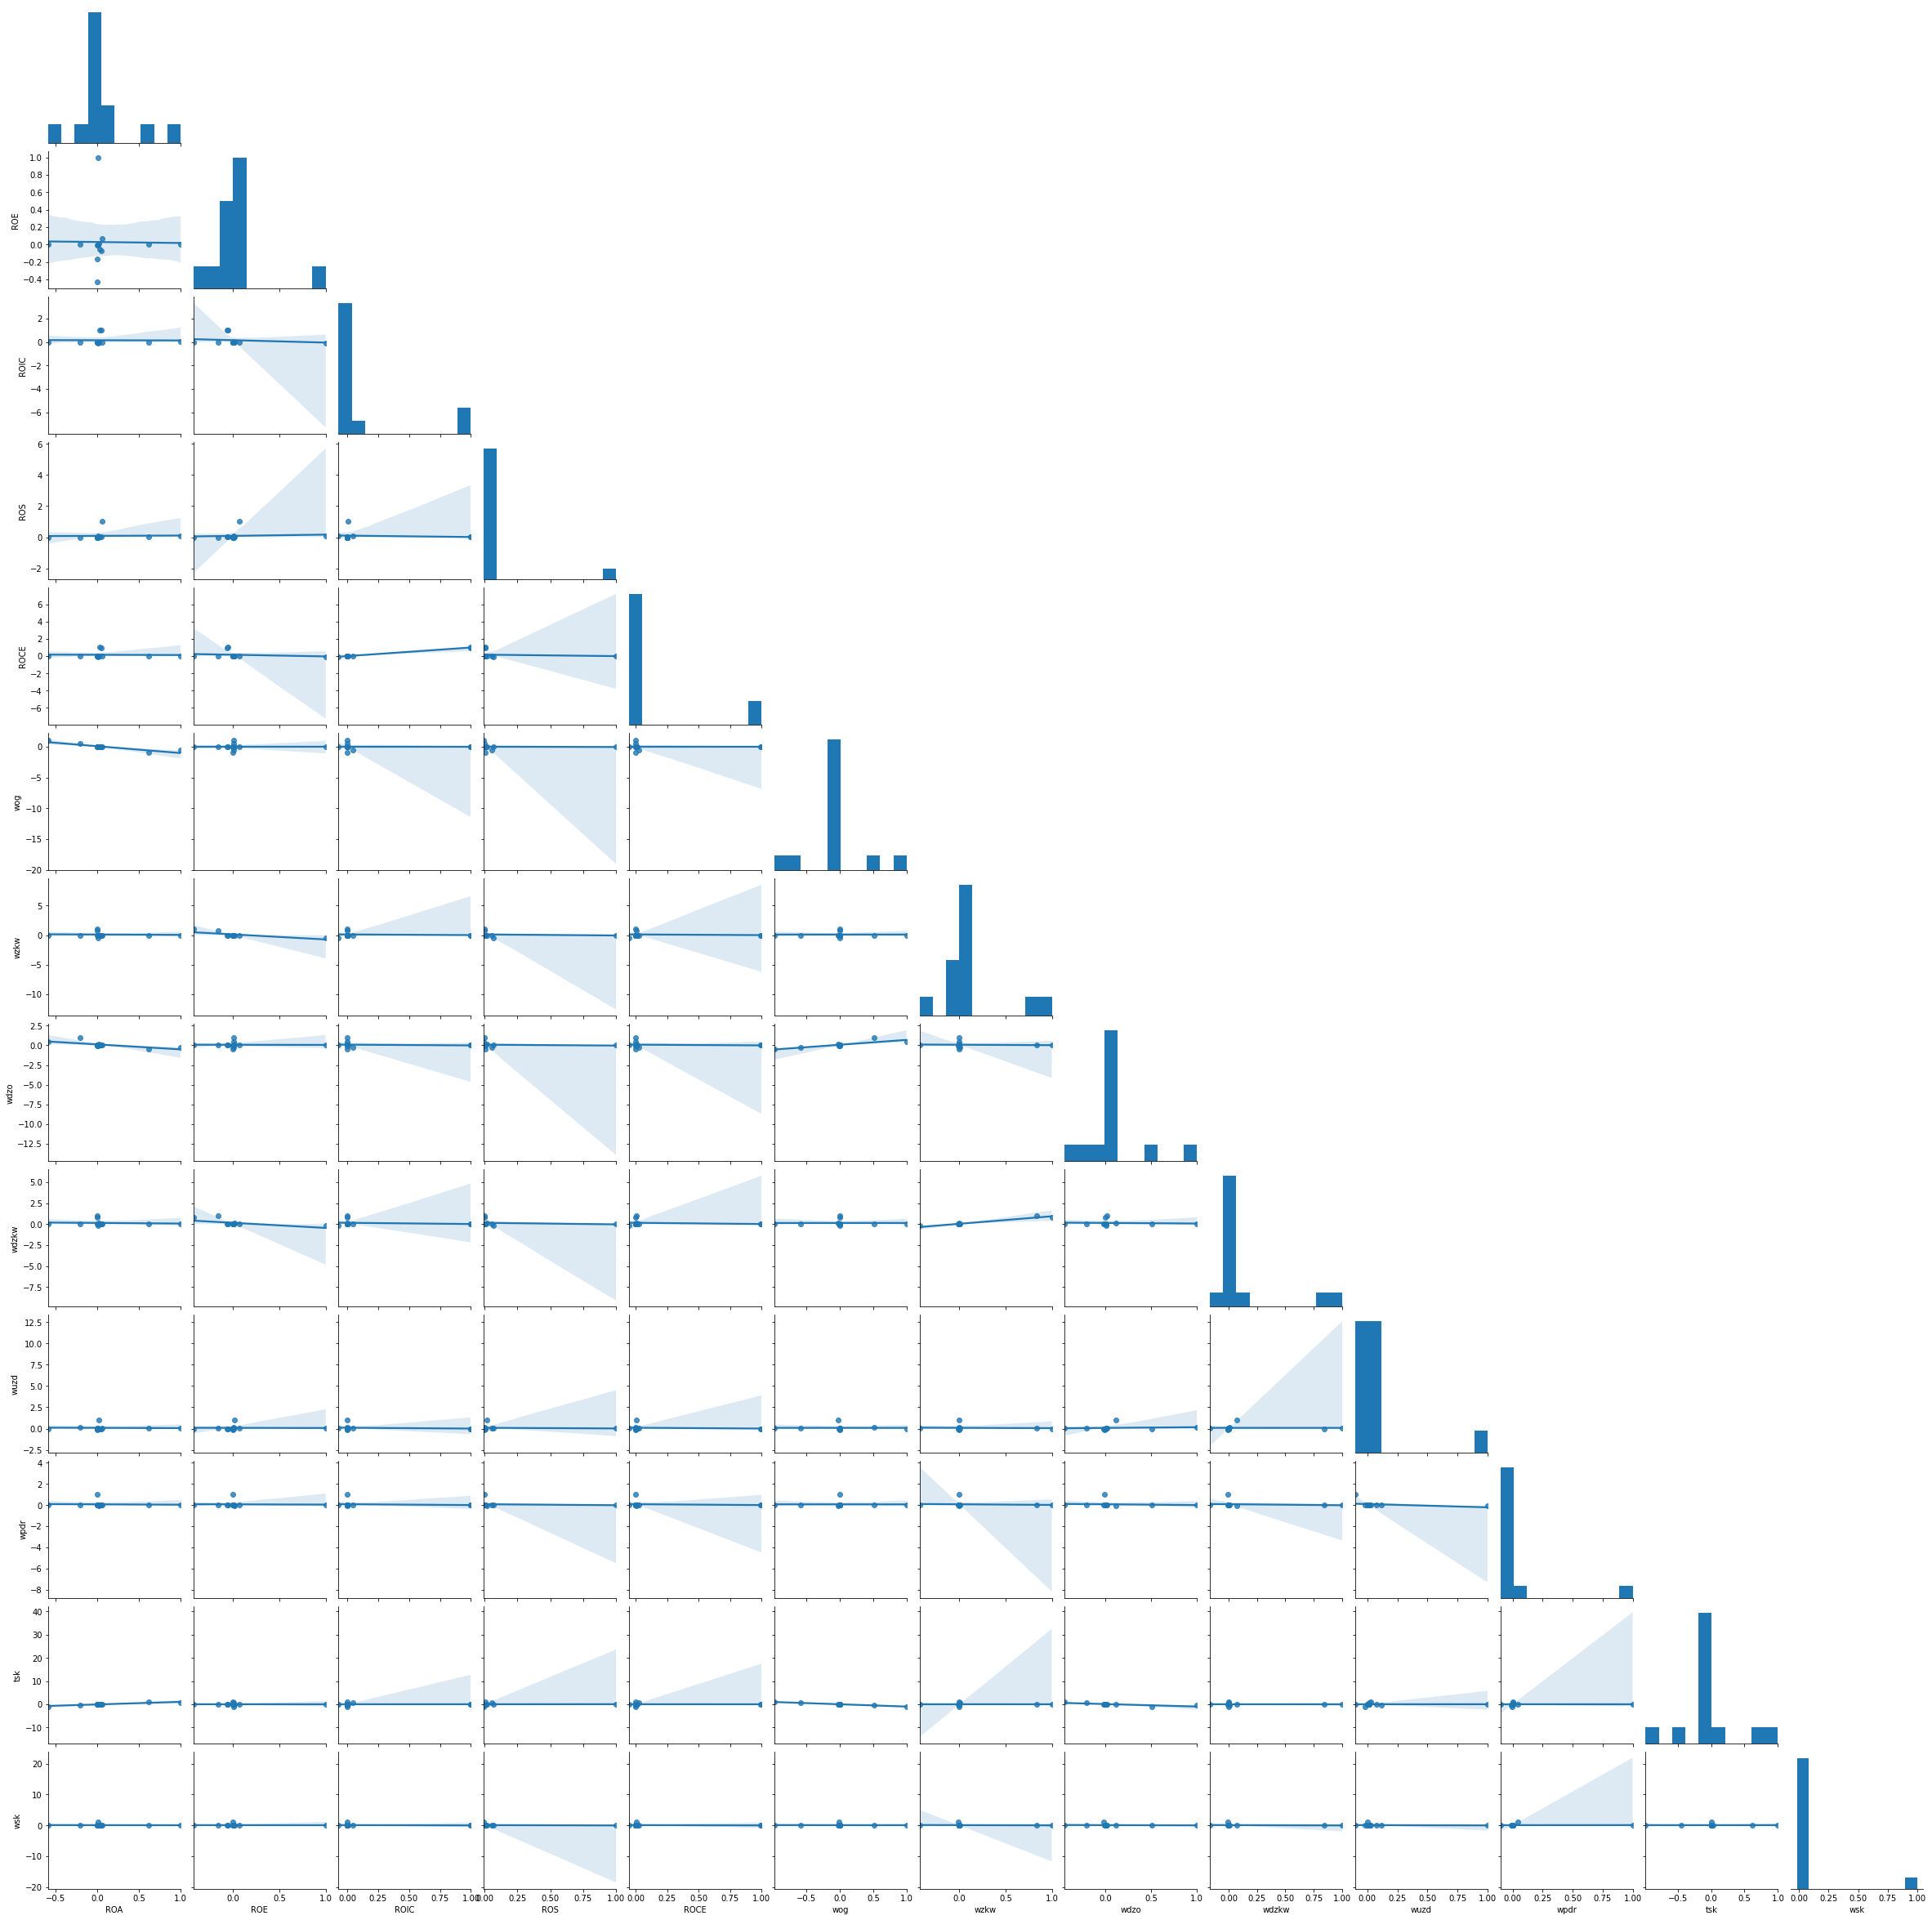

In [24]:
sns.pairplot(corr, corner=True, kind= 'reg', palette = 'huls')

<AxesSubplot:>

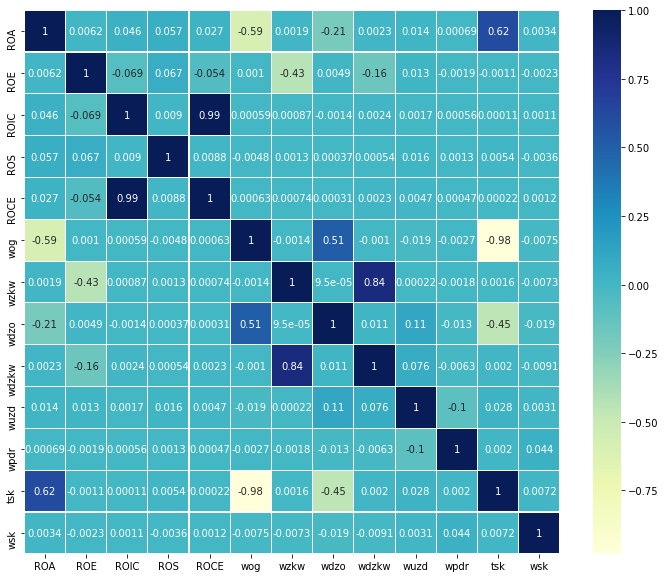

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidth=0.1, 
            xticklabels=corr.columns, yticklabels=corr.columns)